## 近似训练
跳元模型的主要思想是使⽤softmax运算来计算基于给定的中⼼词wc⽣成
上下⽂字wo的条件概率。

由于softmax操作的性质，上下⽂词可以是词表V中的任意项，(14.1.7)包含与整个词表⼤⼩⼀样多的项的求
和。因此，(14.1.8)中跳元模型的梯度计算和 (14.1.15)中的连续词袋模型的梯度计算都包含求和。不幸的是，
在⼀个词典上（通常有⼏⼗万或数百万个单词）求和的梯度的计算成本是巨⼤的！

为了降低上述计算复杂度，本节将介绍两种近似训练⽅法：负采样和分层softmax。由于跳元模型和连续词袋
模型的相似性，我们将以跳元模型为例来描述这两种近似训练⽅法。

### 负采样
负采样修改了原⽬标函数。给定中⼼词wc的上下⽂窗⼝，任意上下⽂词wo来⾃该上下⽂窗⼝的被认为是由下
式建模概率的事件：

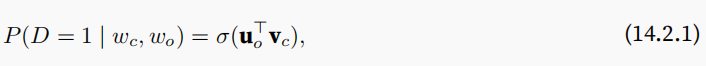

其中σ使⽤了sigmoid激活函数的定义：

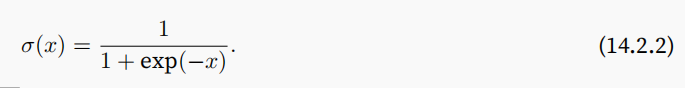

让我们从最⼤化⽂本序列中所有这些事件的联合概率开始训练词嵌⼊。具体⽽⾔，给定⻓度为T的⽂本序列，
以w(t)表⽰时间步t的词，并使上下⽂窗⼝为m，考虑最⼤化联合概率：

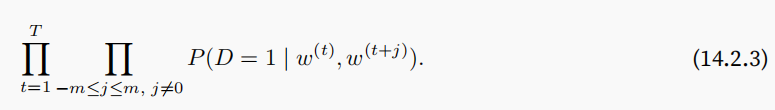

然⽽，(14.2.3)只考虑那些正样本的事件。仅当所有词向量都等于⽆穷⼤时，(14.2.3)中的联合概率才最⼤化
为1。当然，这样的结果毫⽆意义。为了使⽬标函数更有意义，负采样添加从预定义分布中采样的负样本。

⽤S表⽰上下⽂词wo来⾃中⼼词wc的上下⽂窗⼝的事件。对于这个涉及wo的事件，从预定义分布P(w)中采
样K个不是来⾃这个上下⽂窗⼝噪声词。⽤Nk表⽰噪声词wk（k = 1, . . . , K）不是来⾃wc的上下⽂窗⼝的事
件。假设正例和负例S, N1, . . . , NK的这些事件是相互独⽴的。负采样将 (14.2.3)中的联合概率（仅涉及正例）
重写为  
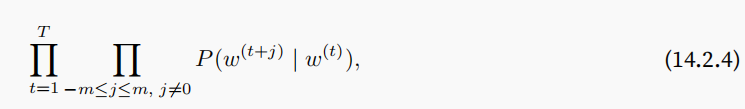

通过事件S, N1, . . . , NK近似条件概率：

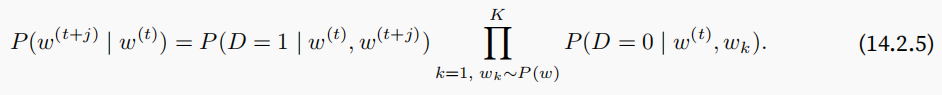

分别⽤it和hk表⽰词w(t)和噪声词wk在⽂本序列的时间步t处的索引。(14.2.5)中关于条件概率的对数损失为：

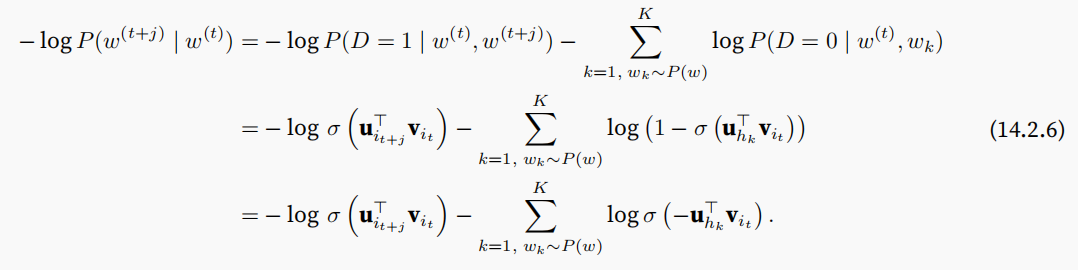

我们可以看到，现在每个训练步的梯度计算成本与词表⼤⼩⽆关，⽽是线性依赖于K。当将超参数K设置为
较⼩的值时，在负采样的每个训练步处的梯度的计算成本较⼩。

### 层序Softmax
作为另⼀种近似训练⽅法，层序Softmax（hierarchical softmax）使⽤⼆叉树（图14.2.1中说明的数据结构），
其中树的每个叶节点表⽰词表V中的⼀个词。

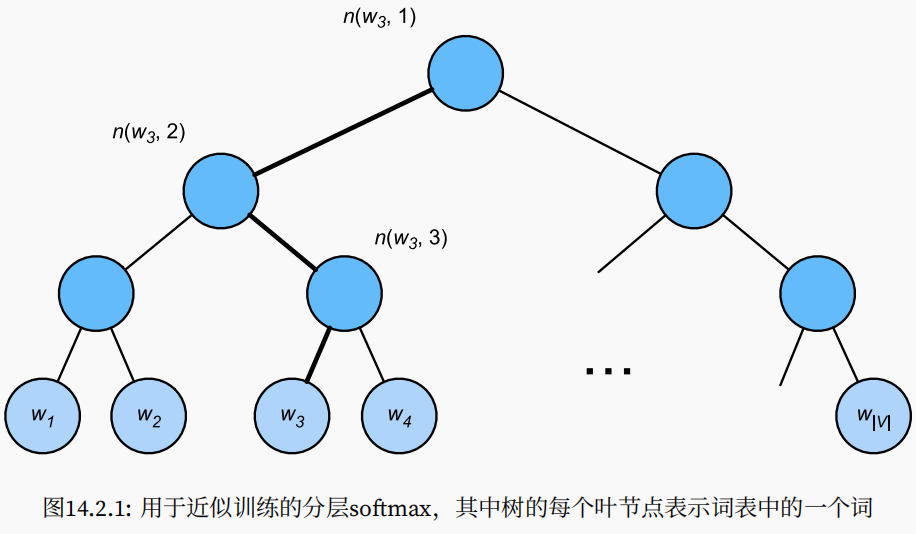

⽤L(w)表⽰⼆叉树中表⽰字w的从根节点到叶节点的路径上的节点数（包括两端）。设n(w, j)为该路径上
的jth节点，其上下⽂字向量为un(w,j)。例如，图14.2.1中的L(w3) = 4。分层softmax将 (14.1.4)中的条件概率
近似为

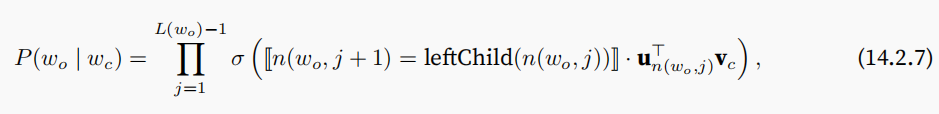

其中函数σ在 (14.2.2)中定义，leftChild(n)是节点n的左⼦节点：如果x为真，[[x]] = 1;否则[[x]] = −1。
为了说明，让我们计算 图14.2.1中给定词wc⽣成词w3的条件概率。这需要wc的词向量vc和从根到w3的路径
（图14.2.1中加粗的路径）上的⾮叶节点向量之间的点积，该路径依次向左、向右和向左遍历：

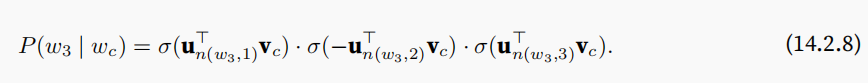

由σ(x) + σ(−x) = 1，它认为基于任意词wc⽣成词表V中所有词的条件概率总和为1：  
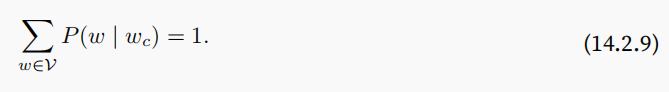

幸运的是，由于⼆叉树结构，L(wo) − 1⼤约与O(log2
|V|)是⼀个数量级。当词表⼤⼩V很⼤时，与没有近似训
练的相⽐，使⽤分层softmax的每个训练步的计算代价显著降低。

## 小结
* 负采样通过考虑相互独⽴的事件来构造损失函数，这些事件同时涉及正例和负例。训练的计算量与每⼀步的噪声词数成线性关系。
* 分层softmax使⽤⼆叉树中从根节点到叶节点的路径构造损失函数。训练的计算成本取决于词表⼤⼩的对数。